## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Load xor toy dataset
with open('/Users/waleedalzarooni/Desktop/xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


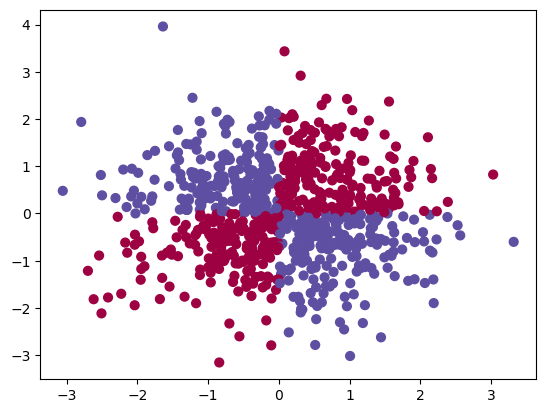

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Params
input_size = X_train.shape[1]  
hidden_size = 10        
output_size = 1        
learning_rate = 0.01     
batch_size = 32         
epochs = 1000           

# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#relu
def relu(x):
    return np.maximum(0, x)

# Derivatives for backpropagation
def sigmoid_derivative(output):
    return output * (1 - output)

def relu_derivative(output):
    return (output > 0).astype(float)

# Forward pass
def forward(X):
    global hidden_layer_input, hidden_layer_output, output_layer_input, output
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    output = sigmoid(output_layer_input)
    return output

# Backward pass
def backward(X, y_true):
    global W1, b1, W2, b2
    m = y_true.shape[0]  # Batch size

    # Calculate gradients for output layer
    d_output = (output - y_true.reshape(-1, 1))  # Cross-entropy loss derivative
    d_W2 = np.dot(hidden_layer_output.T, d_output) / m
    d_b2 = np.sum(d_output, axis=0, keepdims=True) / m

    # Calculate thw gradients for hidden layer
    d_hidden_layer = np.dot(d_output, W2.T) * relu_derivative(hidden_layer_output)
    d_W1 = np.dot(X.T, d_hidden_layer) / m
    d_b1 = np.sum(d_hidden_layer, axis=0, keepdims=True) / m

    # Update weights and biases
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

# Training function with mini-batch SGD
def train(X, y):
    for epoch in range(epochs):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)  # Shuffle data for mini-batch SGD
        X, y = X[indices], y[indices]

        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            forward(X_batch)
            backward(X_batch, y_batch)

        # Logging
        if epoch % 100 == 0:
            y_pred = forward(X)
            loss = log_loss(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss}")

# Cross-validation and performance evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
cross_val_losses = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Reset weights for each fold
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    train(X_train_fold, y_train_fold)
    y_val_pred = forward(X_val_fold)
    val_loss = log_loss(y_val_fold, y_val_pred)
    cross_val_losses.append(val_loss)

print("\nCross-Validation Losses:", cross_val_losses)
print("Average Cross-Validation Loss:", np.mean(cross_val_losses))

# Final training and evaluation
train(X_train, y_train)

# Predictions on the test set
y_test_pred = forward(X_test) > 0.5
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))



Epoch 0, Loss: 0.6931462769458205
Epoch 100, Loss: 0.6917242230785791
Epoch 200, Loss: 0.6627875824503295
Epoch 300, Loss: 0.4524896465022247
Epoch 400, Loss: 0.24433764718248704
Epoch 500, Loss: 0.1714925728442213
Epoch 600, Loss: 0.13709065829465233
Epoch 700, Loss: 0.1167565739666319
Epoch 800, Loss: 0.10311389988879587
Epoch 900, Loss: 0.093212840204851
Epoch 0, Loss: 0.6928741626010195
Epoch 100, Loss: 0.6886845627259366
Epoch 200, Loss: 0.656366924513244
Epoch 300, Loss: 0.4995075950066923
Epoch 400, Loss: 0.35545728085498834
Epoch 500, Loss: 0.27426154119034385
Epoch 600, Loss: 0.2273164342560441
Epoch 700, Loss: 0.19793325262356304
Epoch 800, Loss: 0.17791927170615493
Epoch 900, Loss: 0.16319510284337152
Epoch 0, Loss: 0.692916136604469
Epoch 100, Loss: 0.6890019689699776
Epoch 200, Loss: 0.6499410129303005
Epoch 300, Loss: 0.43546871385275826
Epoch 400, Loss: 0.2376170745068012
Epoch 500, Loss: 0.16763865298692487
Epoch 600, Loss: 0.1342179946819741
Epoch 700, Loss: 0.11440361